In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#uploaidng the data
df_var = pd.read_csv('dataset.csv', index_col=0)

In [3]:
df_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12810 entries, 0 to 12809
Data columns (total 69 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   countrycode                                           12810 non-null  object 
 1   country                                               12810 non-null  object 
 2   currency_unit                                         12810 non-null  object 
 3   year                                                  12810 non-null  int64  
 4   rgdpe                                                 10399 non-null  float64
 5   rgdpo                                                 10399 non-null  float64
 6   pop                                                   10399 non-null  float64
 7   emp                                                   9529 non-null   float64
 8   avh                                                   34

In [4]:
df_var.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,Military expenditure (% of GDP),democ,autoc,polity,polity2,scode,CL,PR,Status,score
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_var.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rnna', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp', 'statcap',
       'csh_c', 'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i',
       'pl_g', 'pl_x', 'pl_m', 'pl_n', 'pl_k', 'countryiso3code',
       'country.value', 'date', 'Trade (% of GDP)',
       'Life expectancy at birth, total (years)',
       'Inflation, consumer prices (annual %)',
       'Official exchange rate (LCU per US$, period average)',
       'Military expenditure (% of GDP)', 'democ', 'autoc', 'polity',
       'polity2', 'scode', 'CL', 'PR', 'Status', 'score'],
      dtype='object')

In [6]:
#getting the model list
model_list = ['country', 'year', 'rgdpe', 'rgdpo',  'pop', 'hc','csh_i', 'csh_g', 'rtfpna',
              'Trade (% of GDP)',
            'Life expectancy at birth, total (years)',
       'Inflation, consumer prices (annual %)',
       'Official exchange rate (LCU per US$, period average)',
       'Military expenditure (% of GDP)', 'score',
            'polity2',  'Status',]

In [7]:
df_model = df_var[model_list]

In [8]:
#explanatory variables
df_ft = df_model.iloc[:,:-2]
#target variables
df_t = df_model.iloc[:,-2:]

In [9]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12810 entries, 0 to 12809
Data columns (total 17 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   country                                               12810 non-null  object 
 1   year                                                  12810 non-null  int64  
 2   rgdpe                                                 10399 non-null  float64
 3   rgdpo                                                 10399 non-null  float64
 4   pop                                                   10399 non-null  float64
 5   hc                                                    8637 non-null   float64
 6   csh_i                                                 10399 non-null  float64
 7   csh_g                                                 10399 non-null  float64
 8   rtfpna                                                64

In [10]:
#cheking the number variables after dropping military expenditure variables with polity2
df_model.drop(['Military expenditure (% of GDP)','score','hc','polity2'], 1).dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 120 to 12738
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   country                                               2084 non-null   object 
 1   year                                                  2084 non-null   int64  
 2   rgdpe                                                 2084 non-null   float64
 3   rgdpo                                                 2084 non-null   float64
 4   pop                                                   2084 non-null   float64
 5   csh_i                                                 2084 non-null   float64
 6   csh_g                                                 2084 non-null   float64
 7   rtfpna                                                2084 non-null   float64
 8   Trade (% of GDP)                                      2

In [11]:
#cheking the number variables after dropping military expenditure variables with Status
df_model.drop(['Military expenditure (% of GDP)','score','hc','Status'], 1).dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2699 entries, 120 to 12738
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   country                                               2699 non-null   object 
 1   year                                                  2699 non-null   int64  
 2   rgdpe                                                 2699 non-null   float64
 3   rgdpo                                                 2699 non-null   float64
 4   pop                                                   2699 non-null   float64
 5   csh_i                                                 2699 non-null   float64
 6   csh_g                                                 2699 non-null   float64
 7   rtfpna                                                2699 non-null   float64
 8   Trade (% of GDP)                                      2

In [12]:
#coorelation table
df_temp = np.log(df_ft.drop(columns=['country','year'])).corr()
df_temp [df_temp>0.66]


/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


,rgdpe,rgdpo,pop,hc,csh_i,csh_g,rtfpna,Trade (% of GDP),"Life expectancy at birth, total (years)","Inflation, consumer prices (annual %)","Official exchange rate (LCU per US$, period average)",Military expenditure (% of GDP),score
rgdpe,1.000000,0.996926,0.846582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rgdpo,0.996926,1.000000,0.844377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pop,0.846582,0.844377,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hc,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.833355,NaN,NaN,NaN,0.662684
csh_i,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
csh_g,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rtfpna,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Trade (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
"Life expectancy at birth, total (years)",NaN,NaN,NaN,0.833355,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
"Inflation, consumer prices (annual %)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [13]:
#calculating gdp per capita
df_model['gdp_per'] = df_model.rgdpo / df_model['pop']

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
#groupping for the calculation of each country shares' at the world level
df_temp_gr = df_model.groupby('year').sum()

In [15]:
df_temp_gr.index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016, 2017, 2018, 2019],
           dtype='int64', name='year')

In [16]:
# calculation of each country shares' at the world level
df_model['share_of_gdp']= df_model[['rgdpo','year']].apply(lambda x: x['rgdpo'] / (df_temp_gr['rgdpo'][x.year]), 1)

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_model.sample(1)

,country,year,rgdpe,rgdpo,pop,hc,csh_i,csh_g,rtfpna,Trade (% of GDP),"Life expectancy at birth, total (years)","Inflation, consumer prices (annual %)","Official exchange rate (LCU per US$, period average)",Military expenditure (% of GDP),score,polity2,Status,gdp_per,share_of_gdp
6481,Saint Kitts and Nevis,1991,455.044769,528.166382,0.040379,NaN,0.274187,0.246722,NaN,NaN,NaN,4.323739,2.7,NaN,NaN,NaN,NaN,13080.22442,0.000012


In [18]:
#controling whether the calculation right or not
df_model[(df_model.year == 2000)&(df_model.country == 'Guinea-Bissau')]['rgdpe']/(df_model[df_model.year==2000]['rgdpo'].sum())

4670    0.000034
Name: rgdpe, dtype: float64

In [19]:
# calculation of each country shares' at the world level
df_model['share_of_pop']= df_model[['pop','year']].apply(lambda x: x['pop'] / (df_temp_gr['pop'][x.year]), 1)

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_model.sample(1)

,country,year,rgdpe,rgdpo,pop,hc,csh_i,csh_g,rtfpna,Trade (% of GDP),"Life expectancy at birth, total (years)","Inflation, consumer prices (annual %)","Official exchange rate (LCU per US$, period average)",Military expenditure (% of GDP),score,polity2,Status,gdp_per,share_of_gdp,share_of_pop
10661,Slovakia,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.099488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12810 entries, 0 to 12809
Data columns (total 20 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   country                                               12810 non-null  object 
 1   year                                                  12810 non-null  int64  
 2   rgdpe                                                 10399 non-null  float64
 3   rgdpo                                                 10399 non-null  float64
 4   pop                                                   10399 non-null  float64
 5   hc                                                    8637 non-null   float64
 6   csh_i                                                 10399 non-null  float64
 7   csh_g                                                 10399 non-null  float64
 8   rtfpna                                                64

In [22]:
#chaging model values because of high correlation
df_ft = df_model.drop(columns=['rgdpe','rgdpo','pop','polity2','Status', 'score'])

In [23]:
#correlation table
df_temp = df_ft.drop(columns=['country','year']).corr()
df_temp [df_temp>0.66]

,hc,csh_i,csh_g,rtfpna,Trade (% of GDP),"Life expectancy at birth, total (years)","Inflation, consumer prices (annual %)","Official exchange rate (LCU per US$, period average)",Military expenditure (% of GDP),gdp_per,share_of_gdp,share_of_pop
hc,1.000000,NaN,NaN,NaN,NaN,0.822568,NaN,NaN,NaN,NaN,NaN,NaN
csh_i,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
csh_g,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rtfpna,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trade (% of GDP),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Life expectancy at birth, total (years)",0.822568,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
"Inflation, consumer prices (annual %)",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
"Official exchange rate (LCU per US$, period average)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Military expenditure (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
gdp_per,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [24]:
#correlation table for logged values
df_temp = np.log(df_ft.drop(columns=['country','year'])).corr()
df_temp [df_temp>0.66]

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


,hc,csh_i,csh_g,rtfpna,Trade (% of GDP),"Life expectancy at birth, total (years)","Inflation, consumer prices (annual %)","Official exchange rate (LCU per US$, period average)",Military expenditure (% of GDP),gdp_per,share_of_gdp,share_of_pop
hc,1.000000,NaN,NaN,NaN,NaN,0.833355,NaN,NaN,NaN,0.774993,NaN,NaN
csh_i,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
csh_g,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rtfpna,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trade (% of GDP),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Life expectancy at birth, total (years)",0.833355,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.764062,NaN,NaN
"Inflation, consumer prices (annual %)",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
"Official exchange rate (LCU per US$, period average)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Military expenditure (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
gdp_per,0.774993,NaN,NaN,NaN,NaN,0.764062,NaN,NaN,NaN,1.000000,NaN,NaN


In [25]:
# a closer looked for the correlated values
df_ft[['share_of_gdp','share_of_pop']].corr()

,share_of_gdp,share_of_pop
share_of_gdp,1.000000,0.488703
share_of_pop,0.488703,1.000000


<AxesSubplot:xlabel='share_of_gdp', ylabel='share_of_pop'>

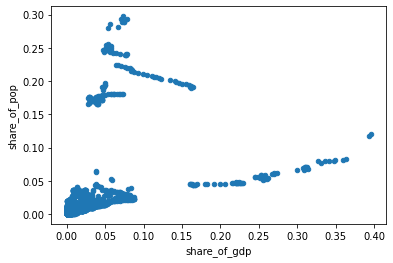

In [26]:
# a closer looked for the correlated values
df_ft[['share_of_gdp','share_of_pop']].plot.scatter('share_of_gdp','share_of_pop')

In [27]:
# a closer looked for the correlated values
np.log(df_ft[['share_of_gdp','share_of_pop']]).corr()

,share_of_gdp,share_of_pop
share_of_gdp,1.000000,0.860473
share_of_pop,0.860473,1.000000


<AxesSubplot:xlabel='share_of_gdp', ylabel='share_of_pop'>

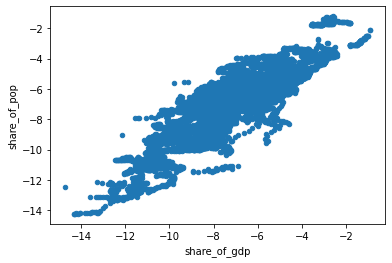

In [28]:
# a closer looked for the correlated values
np.log(df_ft[['share_of_gdp','share_of_pop']]).plot.scatter('share_of_gdp','share_of_pop')

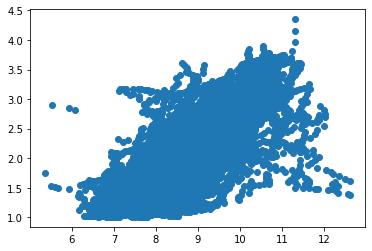

In [29]:
# a closer looked for the correlated values
plt.scatter(np.log(df_model.gdp_per), df_model.hc)

In [30]:
#since there is high correlation between some variables, checking correlation with dependent variables might be helpful
np.log(df_model.polity2 + 11).corr(np.log(df_model['Life expectancy at birth, total (years)']))

0.38966794311448383

In [31]:
np.log(df_model.polity2 + 11).corr(np.log(df_model['hc']))

0.49074168512087896

In [32]:
np.log(df_model.polity2 + 11).corr(np.log(df_model['gdp_per']))

0.2422763203606322

In [33]:
#giving numeric values to Statıu column
df_temp = df_model.copy()
df_model.Status = df_model.Status.map({'F':3,'PF':2,'NF':1}, na_action=False)


/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [34]:
np.log(df_model.Status).corr(np.log(df_model['Life expectancy at birth, total (years)']))

0.4575932614989647

In [35]:
np.log(df_model.Status).corr(np.log(df_model['hc']))

0.5203010396176238

In [36]:
np.log(df_model.Status).corr(np.log(df_model['gdp_per']))

0.3869145382174529

In [37]:
#changing model according correlations
df_model = df_model.rename(columns={'Trade (% of GDP)':'trade','Life expectancy at birth, total (years)':'life_expt',
                 'Inflation, consumer prices (annual %)':'inflation',
                'Official exchange rate (LCU per US$, period average)':'exchange_rate',
                'Military expenditure (% of GDP)':'military_expt'})

In [38]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12810 entries, 0 to 12809
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        12810 non-null  object 
 1   year           12810 non-null  int64  
 2   rgdpe          10399 non-null  float64
 3   rgdpo          10399 non-null  float64
 4   pop            10399 non-null  float64
 5   hc             8637 non-null   float64
 6   csh_i          10399 non-null  float64
 7   csh_g          10399 non-null  float64
 8   rtfpna         6412 non-null   float64
 9   trade          7745 non-null   float64
 10  life_expt      10108 non-null  float64
 11  inflation      7478 non-null   float64
 12  exchange_rate  9124 non-null   float64
 13  military_expt  7045 non-null   float64
 14  score          1181 non-null   float64
 15  polity2        5469 non-null   float64
 16  Status         4001 non-null   float64
 17  gdp_per        10399 non-null  float64
 18  share_

In [39]:
df_ft = df_model.drop(columns=['rgdpe','rgdpo','pop','score','polity2','Status','share_of_pop'])

In [40]:
df_ft.sample(5)

,country,year,hc,csh_i,csh_g,rtfpna,trade,life_expt,inflation,exchange_rate,military_expt,gdp_per,share_of_gdp
4072,Fiji,1962,1.570311,0.215391,0.166338,NaN,NaN,61.478000,NaN,0.792858,NaN,3041.578639,0.000104
1679,Bolivia (Plurinational State of),2019,2.966044,0.170845,0.132121,0.979279,56.397307,NaN,1.839545,6.910000,1.421958,8584.630633,0.000789
10091,Sudan,1961,NaN,NaN,NaN,NaN,27.665571,48.618000,8.760511,0.000348,1.844961,NaN,NaN
8949,Norway,2009,3.550929,0.231571,0.132315,1.009788,67.054797,80.795122,2.197386,6.288333,1.604295,77867.002959,0.004166
6014,Jamaica,2014,2.573586,0.209948,0.191263,1.014403,84.749628,74.042000,8.290006,110.934528,0.872889,8039.155482,0.000206


In [41]:
df_t = df_model[['country','year','Status','polity2']]

In [42]:
df_t.sample(5)

,country,year,Status,polity2
7125,Lithuania,2005,3.0,10.0
7365,Morocco,1965,NaN,-9.0
3186,Czech Republic,1986,NaN,NaN
8887,Netherlands,2017,3.0,NaN
5382,Hungary,2012,3.0,NaN


In [43]:
#distribution of Status values
df_t.Status.value_counts()

3.0    1686
2.0    1282
1.0    1033
Name: Status, dtype: int64

In [44]:
#distribution of polity2 values
df_t.polity2.value_counts()

 10.0    995
-7.0     686
 6.0     367
-9.0     365
 8.0     327
-6.0     312
 9.0     263
 7.0     262
 5.0     258
-10.0    249
 4.0     180
-4.0     173
-8.0     159
-5.0     150
-3.0     149
-2.0     137
-1.0     109
 0.0      93
 1.0      90
 2.0      76
 3.0      69
Name: polity2, dtype: int64

In [45]:
#correlation between dependent var, since they are highly correlated, one might be used for anohter
df_t.drop('year',1).corr()

,Status,polity2
Status,1.00000,0.80094
polity2,0.80094,1.00000


In [46]:
#crosstab for Status and polity2 variables
pd.crosstab(df_t.polity2, df_t.Status)

Status,1.0,2.0,3.0
polity2,,,
-10.0,77,24,0
-9.0,97,19,0
-8.0,48,31,0
-7.0,188,70,2
-6.0,61,49,0
-5.0,13,14,0
-4.0,41,54,0
-3.0,54,19,1
-2.0,49,41,0


In [47]:
df_ft

,country,year,hc,csh_i,csh_g,rtfpna,trade,life_expt,inflation,exchange_rate,military_expt,gdp_per,share_of_gdp
0,Aruba,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,Zimbabwe,2015,2.584653,0.077963,0.176403,0.999666,56.748811,59.534,-2.430968,NaN,1.886876,2880.905780,0.000353
12806,Zimbabwe,2016,2.616257,0.076169,0.168887,0.980511,51.219025,60.294,-1.543670,NaN,1.742494,2919.616893,0.000357
12807,Zimbabwe,2017,2.648248,0.075448,0.207101,1.000000,50.028296,60.812,0.893962,NaN,1.544948,3112.875107,0.000371
12808,Zimbabwe,2018,2.680630,0.079576,0.269799,1.018163,50.005361,61.195,10.618866,NaN,1.222795,3007.236919,0.000354


# EPA
##

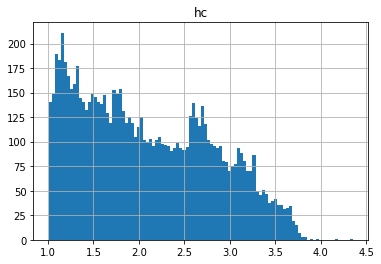

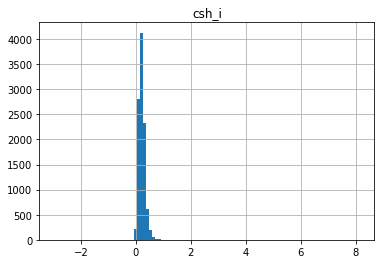

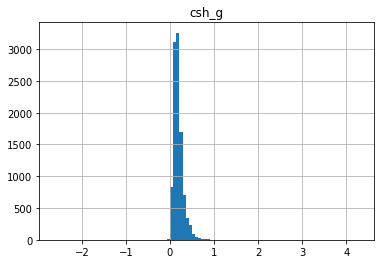

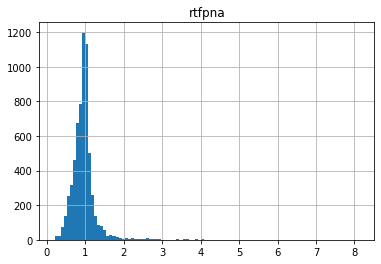

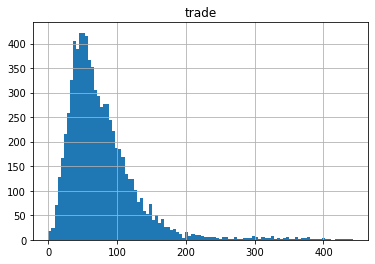

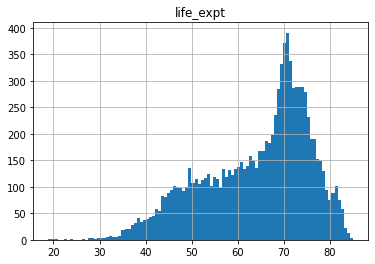

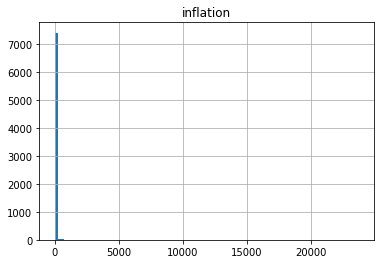

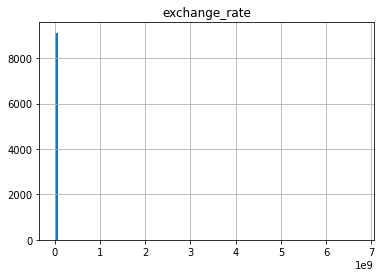

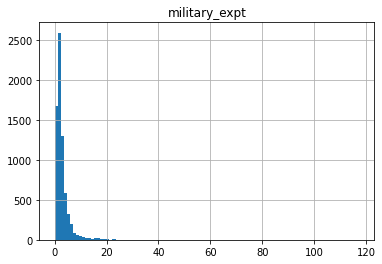

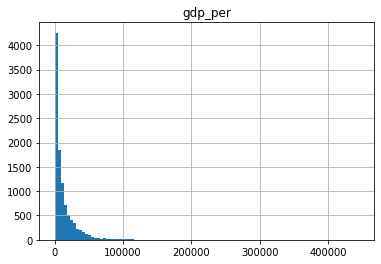

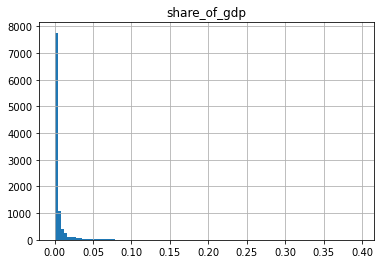

In [48]:
#histogram for each independent variables
for i in df_ft.columns[2:]:
    df_ft[i].hist(bins=100)
    plt.title(i)
    plt.show()


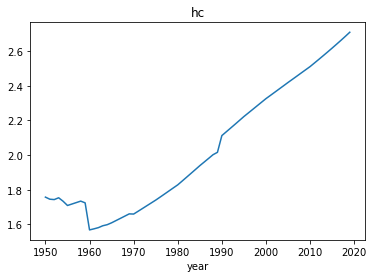

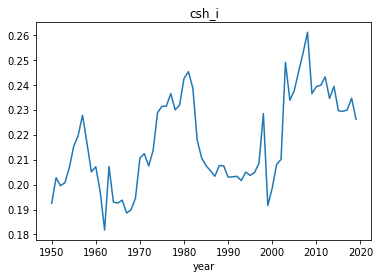

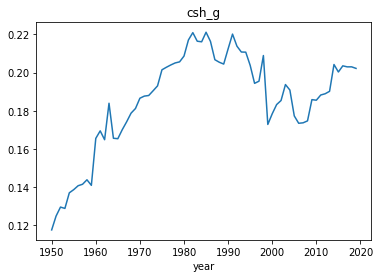

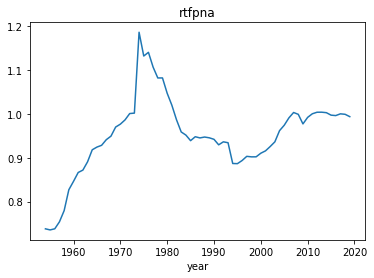

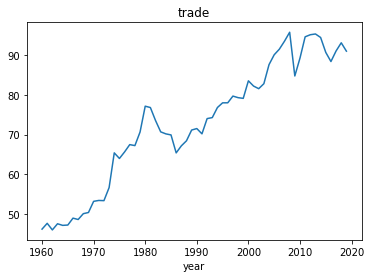

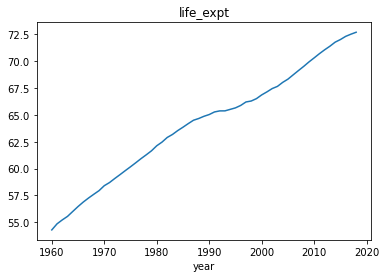

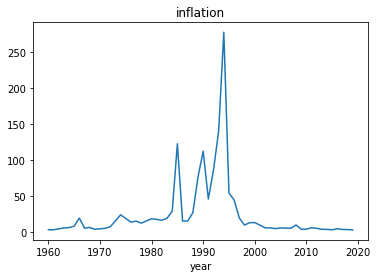

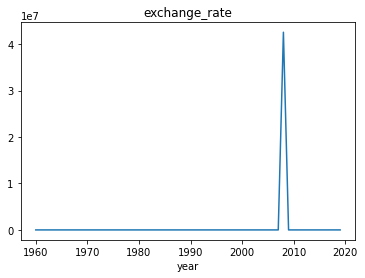

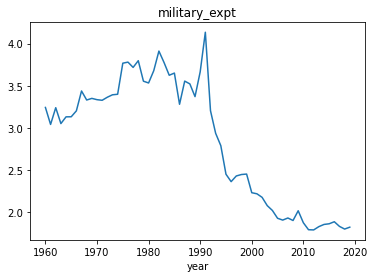

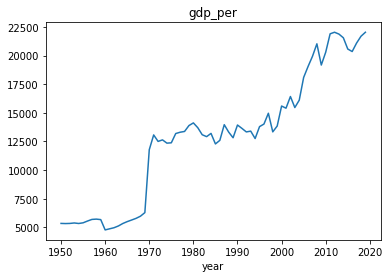

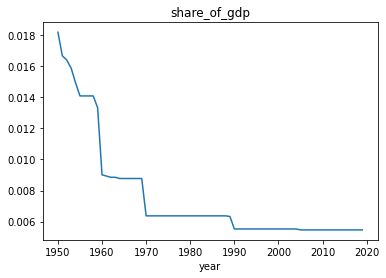

In [49]:
#changes over years for each independent variables
for i in df_ft.columns[2:]:
    df_ft.groupby('year').mean()[i].plot()
    plt.title(i)
    plt.show()


In [50]:
#**2008 crisis
df_ft.groupby('year').mean()[['exchange_rate']].tail(20)

,exchange_rate
year,
2000,4.697175e+02
2001,5.076608e+02
2002,5.271497e+02
2003,5.263234e+02
2004,5.391670e+02
2005,5.538776e+02
2006,5.576198e+02
2007,5.971306e+02
2008,4.255150e+07


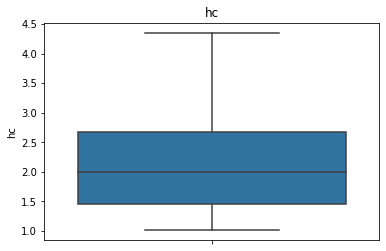

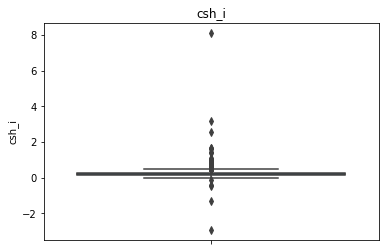

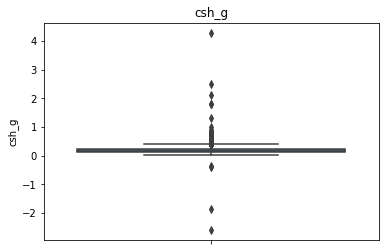

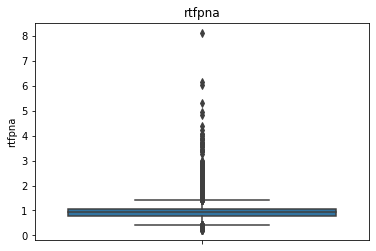

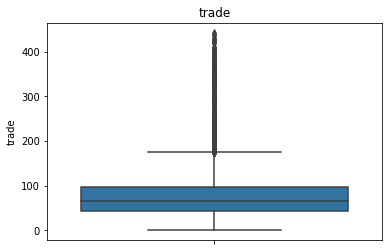

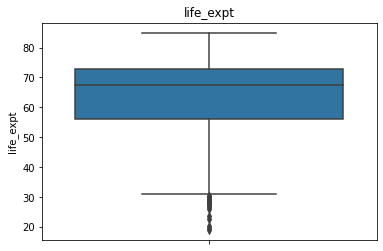

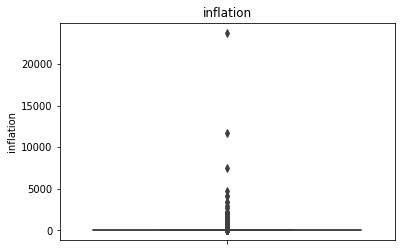

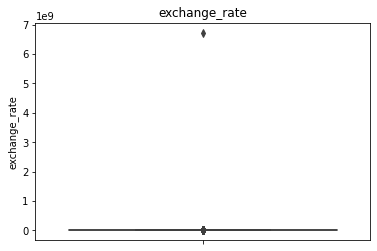

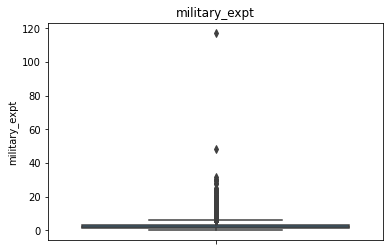

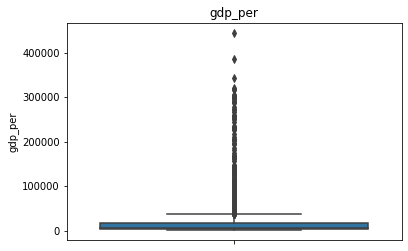

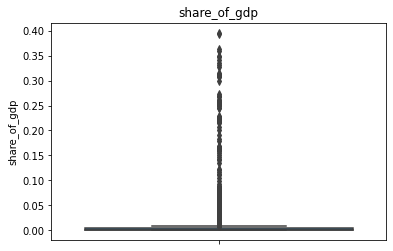

In [51]:
#boxplotting for each independent variables
for i in df_ft.columns[2:]:
    sns.boxplot(y=df_ft[i])
    plt.title(i)
    plt.show()

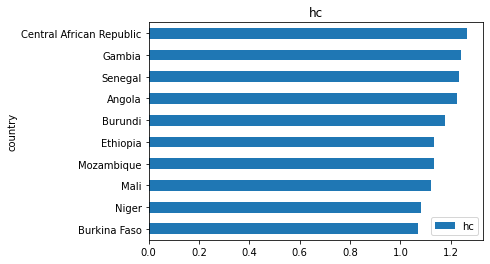

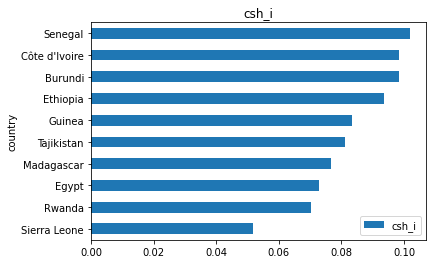

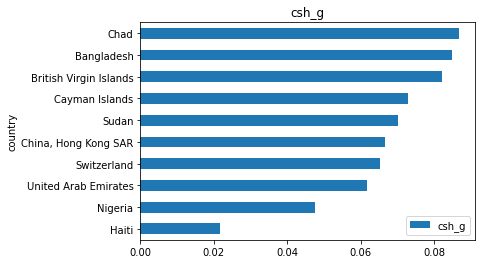

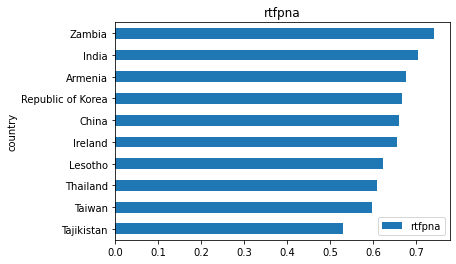

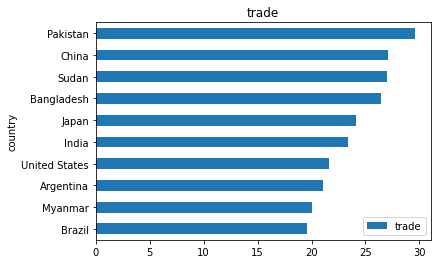

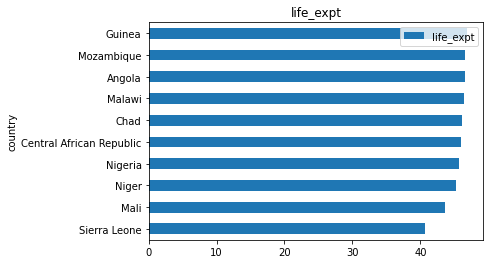

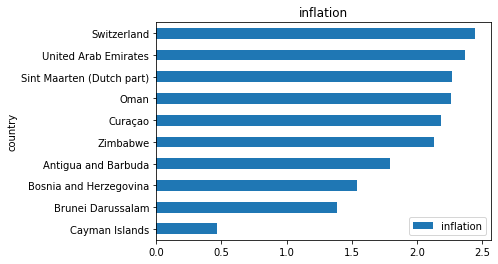

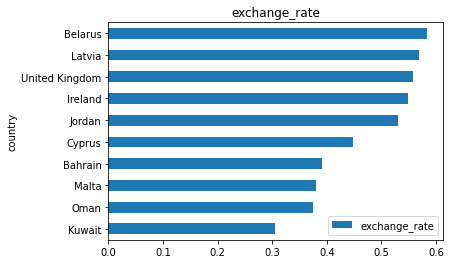

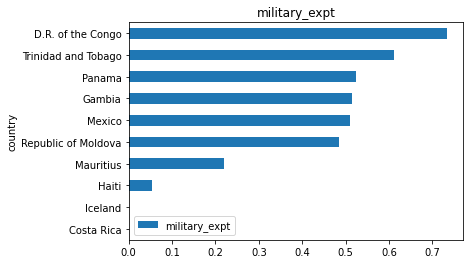

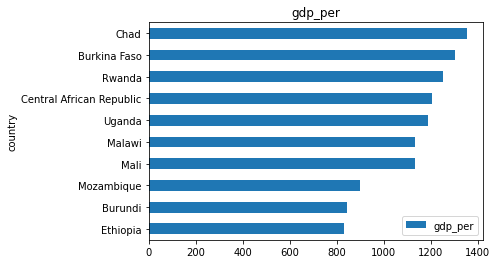

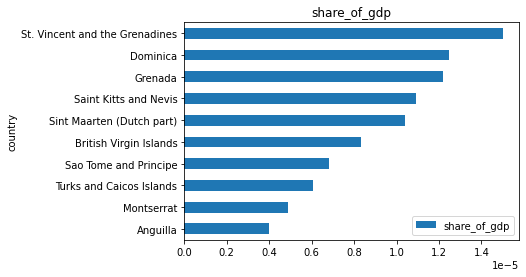

In [52]:
#min values for each independent variables
for i in df_ft.columns[2:]:
    df_ft.groupby('country').mean().sort_values(by=i)[[i]].head(10).plot.barh()
    plt.title(i)
    plt.show()

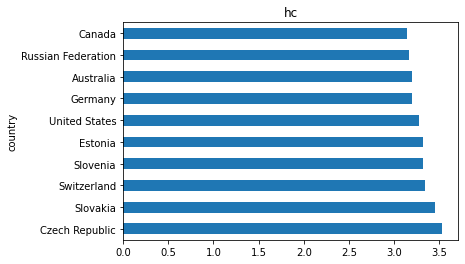

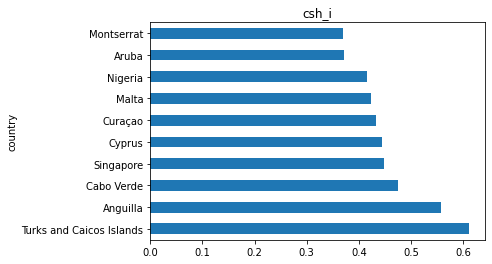

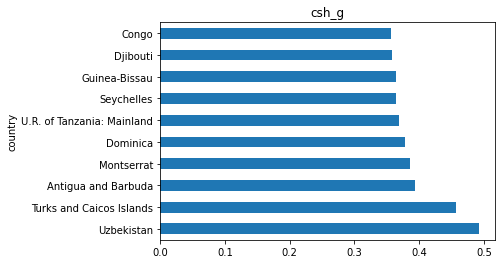

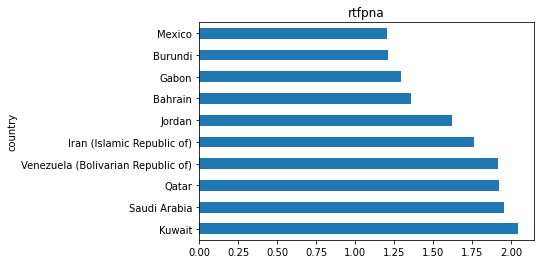

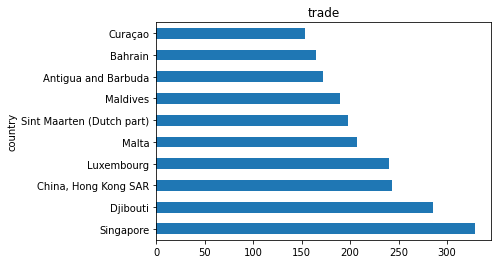

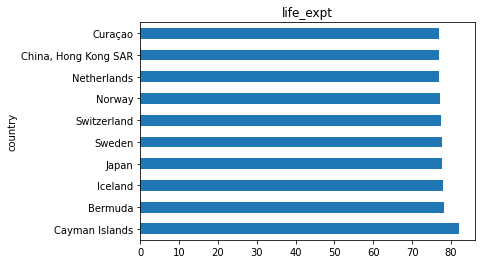

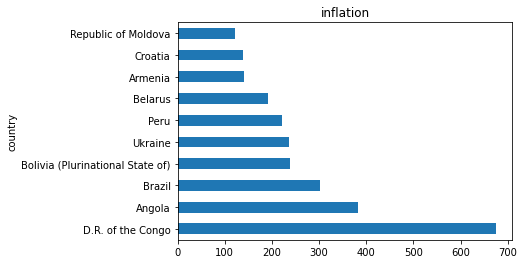

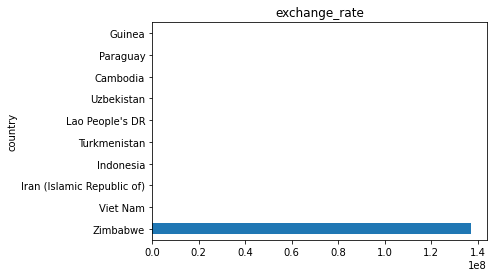

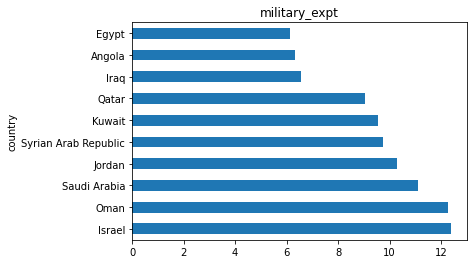

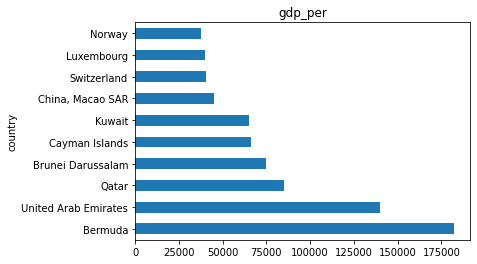

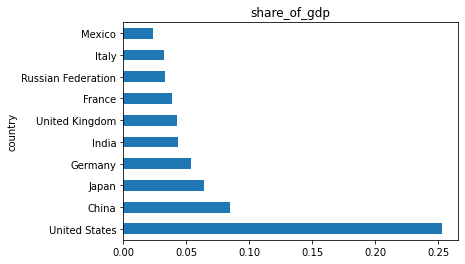

In [53]:
#max values for each independent variables
for i in df_ft.columns[2:]:
    df_ft.groupby('country').mean().sort_values(by=i, ascending=False)[i].head(10).plot.barh()
    plt.title(i)
    plt.show()

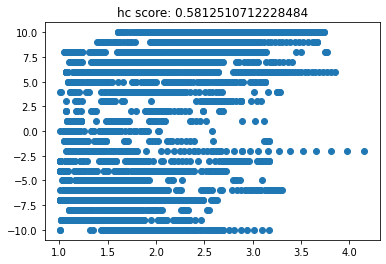

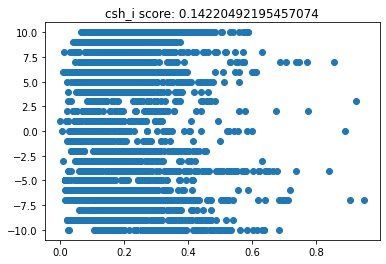

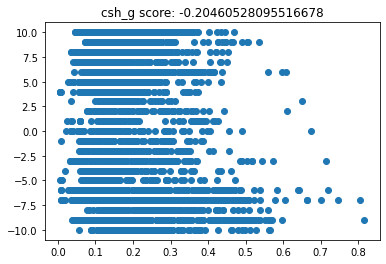

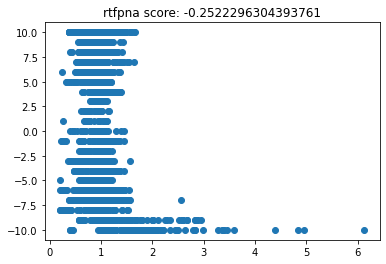

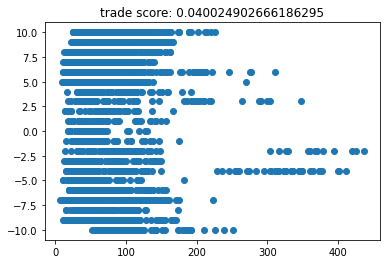

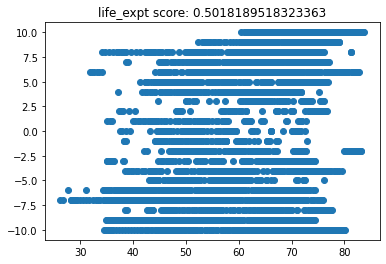

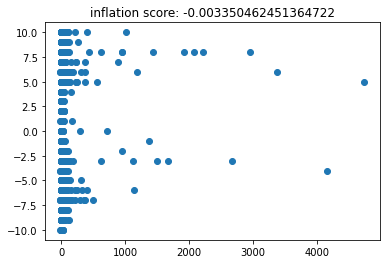

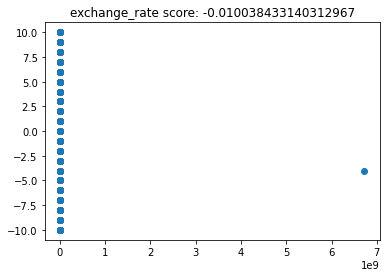

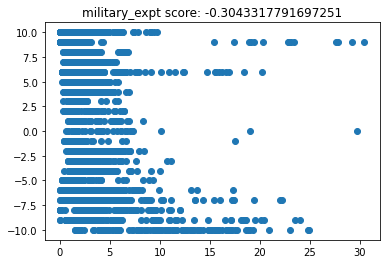

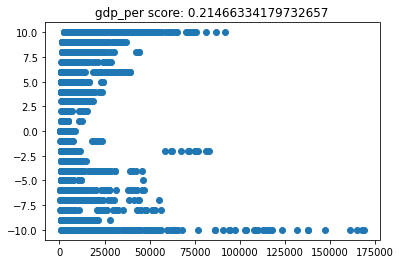

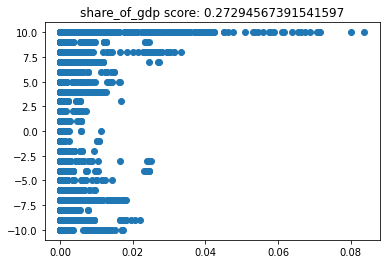

In [54]:
#scatter plot for each independent variables with polity2 dependent varibales
for i in df_ft.columns[2:]:
    plt.scatter(df_ft[i], df_t.polity2)
    a = df_ft[i].corr(df_t.polity2)
    plt.title(f"{i} score: {a}" )
    plt.show()



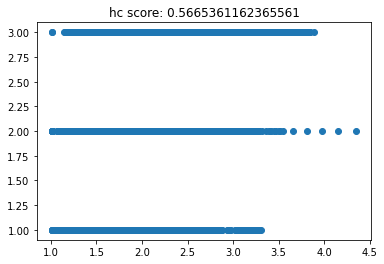

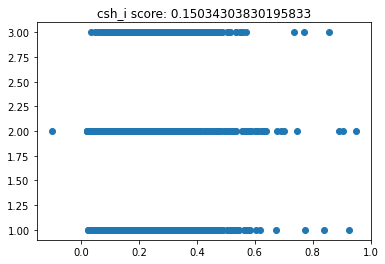

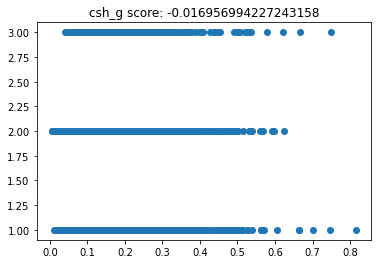

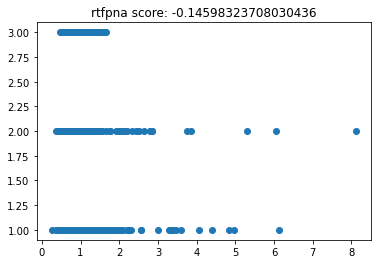

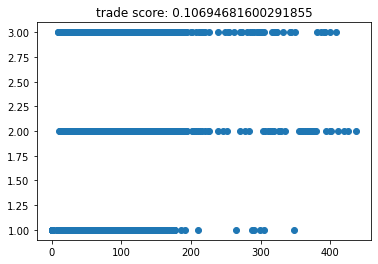

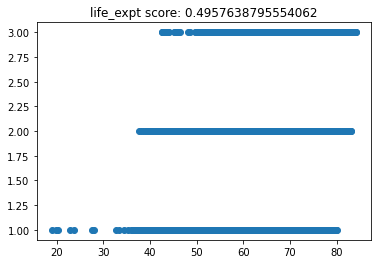

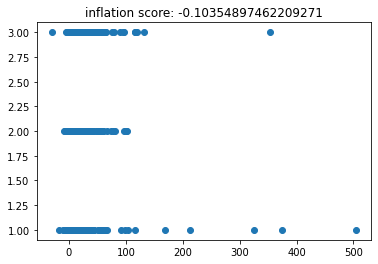

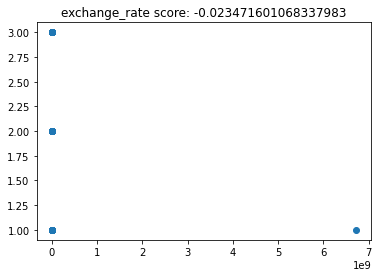

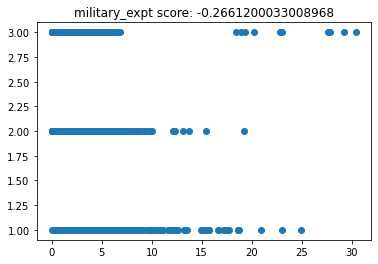

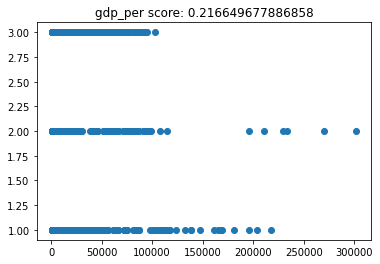

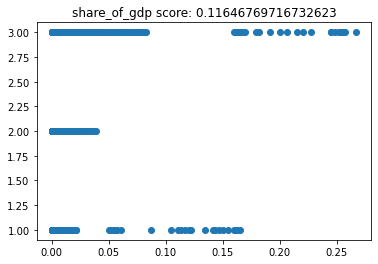

In [55]:
#scatter plot for each independent variables with Status dependent varibales
for i in df_ft.columns[2:]:
    plt.scatter(df_ft[i], df_t.Status)
    a = df_ft[i].corr(df_t.Status)
    plt.title(f"{i} score: {a}" )
    plt.show()

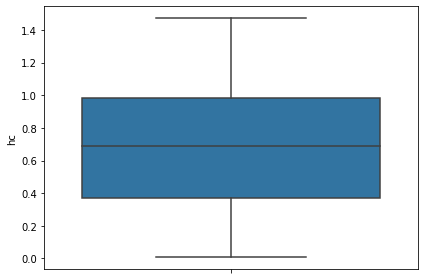

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


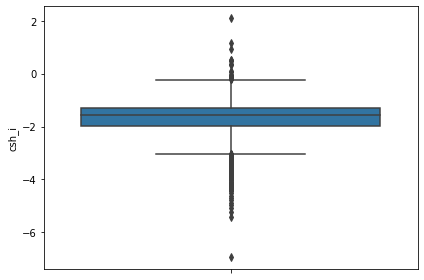

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


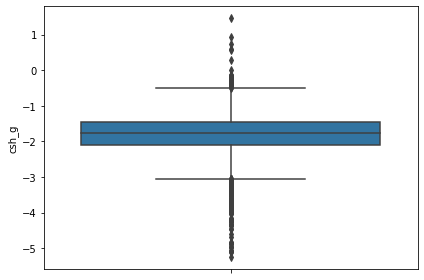

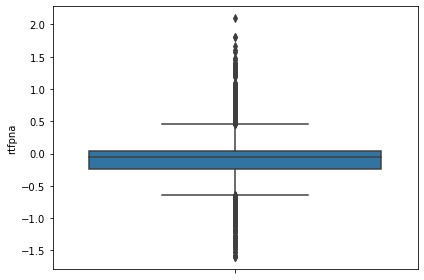

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


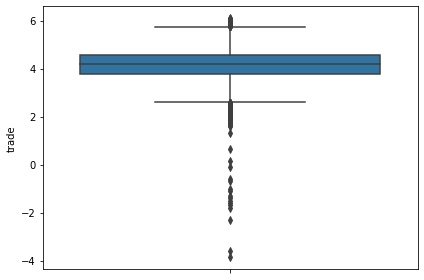

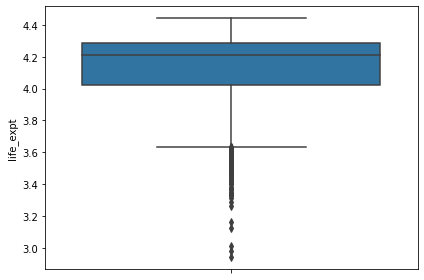

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


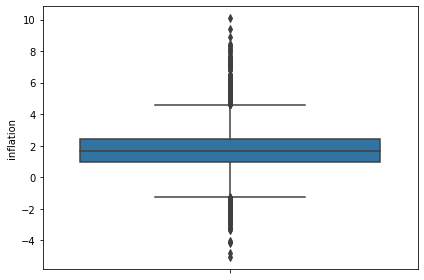

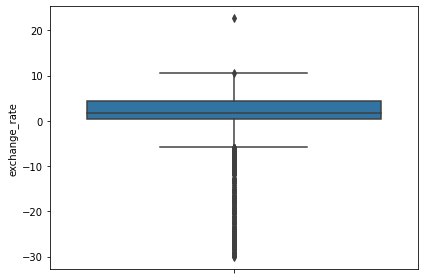

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


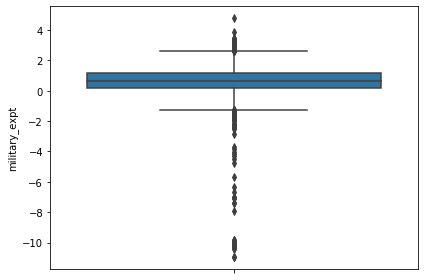

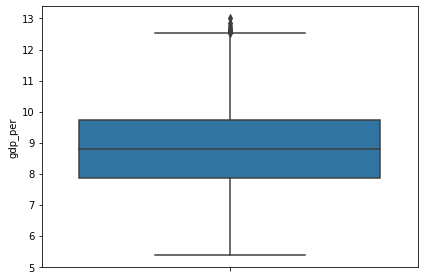

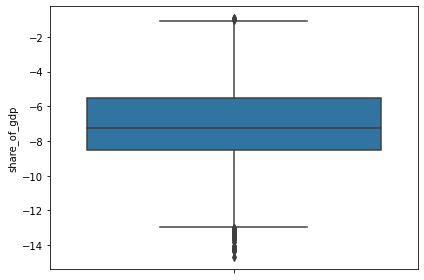

In [57]:
#boxplotting for each independent logged variables
for i in df_ft.columns[2:]:
    sns.boxplot(y=np.log(df_ft[i]))
    plt.tight_layout()
    plt.show()

## Focus on Exchange Rate and Inflation

<AxesSubplot:>

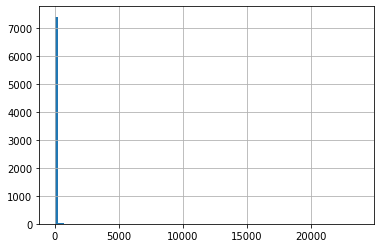

In [59]:
df_model.inflation.hist(bins=100)

In [60]:
#getting outlier for inflation
df_model[df_model.inflation > 5000]

,country,year,rgdpe,rgdpo,pop,hc,csh_i,csh_g,rtfpna,trade,life_expt,inflation,exchange_rate,military_expt,score,polity2,Status,gdp_per,share_of_gdp,share_of_pop
1645,Bolivia (Plurinational State of),1985,15138.962891,15270.309570,6.179460,2.004112,0.130943,0.214905,0.894783,41.892765,53.115,11749.639632,0.440029,2.013993,NaN,NaN,NaN,2471.139804,0.000468,0.001380
2564,D.R. of the Congo,1994,32698.857422,31580.269531,40.252975,1.452792,0.079373,0.181061,NaN,42.516722,49.220,23773.131774,0.011941,NaN,NaN,NaN,NaN,784.544982,0.000644,0.007212
9350,Peru,1990,81596.671875,81677.820312,22.071433,2.204847,0.138082,0.185584,0.929248,29.469677,66.165,7481.663611,0.187886,2.682379,NaN,NaN,NaN,3700.612476,0.001836,0.004202


<AxesSubplot:>

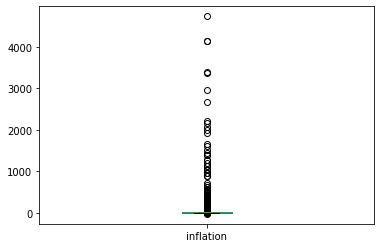

In [61]:
df_model[df_model.inflation < 5000]['inflation'].plot.box()

In [62]:
#getting outlier for inflation
df_model[df_model.inflation > 2000]

,country,year,rgdpe,rgdpo,pop,hc,csh_i,csh_g,rtfpna,trade,life_expt,inflation,exchange_rate,military_expt,score,polity2,Status,gdp_per,share_of_gdp,share_of_pop
115,Angola,1995,3.655082e+04,3.198311e+04,13.945206,1.214912,0.630909,0.245304,0.612367,NaN,45.246000,2666.450593,2.750230e-03,4.707393,NaN,-3.0,NaN,2293.483902,0.000620,0.002463
116,Angola,1996,4.877160e+04,4.062082e+04,14.400719,1.230892,0.738166,0.083089,0.631981,NaN,45.350000,4145.105982,1.280292e-01,2.447848,NaN,-4.0,NaN,2820.749458,0.000746,0.002509
464,Armenia,1994,9.068850e+03,9.502244e+03,3.283667,3.006614,0.161023,0.416534,0.237190,112.429365,68.538000,3373.759443,2.886508e+02,NaN,NaN,6.0,NaN,2893.790430,0.000194,0.000588
1444,Belarus,1994,8.810781e+04,8.777566e+04,10.108291,NaN,0.216054,0.452442,NaN,155.375710,68.768293,2221.016570,3.641113e-04,3.621608,NaN,8.0,NaN,8683.531574,0.001789,0.001811
1645,Bolivia (Plurinational State of),1985,1.513896e+04,1.527031e+04,6.179460,2.004112,0.130943,0.214905,0.894783,41.892765,53.115000,11749.639632,4.400290e-01,2.013993,NaN,NaN,NaN,2471.139804,0.000468,0.001380
1720,Brazil,1990,9.472478e+05,9.545720e+05,149.003223,1.716691,0.155043,0.127778,1.156577,15.161756,66.343000,2947.732772,2.955727e-05,2.363841,NaN,8.0,NaN,6406.384914,0.021458,0.028366
1724,Brazil,1994,1.292395e+06,1.300093e+06,159.432716,1.831192,0.172799,0.208639,1.177036,19.332905,67.932000,2075.888398,6.646835e-01,2.016008,NaN,8.0,NaN,8154.491641,0.026499,0.028564
2561,D.R. of the Congo,1991,4.308646e+04,4.221914e+04,35.908244,1.376090,0.102606,0.264028,NaN,NaN,49.225000,2154.436827,5.194569e-08,NaN,NaN,NaN,NaN,1175.750633,0.000934,0.006727
2562,D.R. of the Congo,1992,5.606564e+04,5.457311e+04,37.333914,1.401197,0.054055,0.478340,NaN,NaN,49.311000,4129.169857,2.151363e-06,NaN,NaN,NaN,NaN,1461.756980,0.001175,0.006887
2564,D.R. of the Congo,1994,3.269886e+04,3.158027e+04,40.252975,1.452792,0.079373,0.181061,NaN,42.516722,49.220000,23773.131774,1.194119e-02,NaN,NaN,NaN,NaN,784.544982,0.000644,0.007212


<AxesSubplot:>

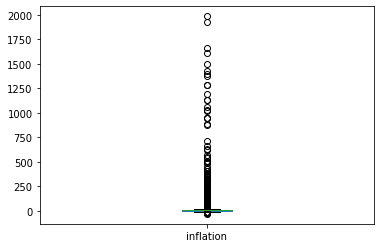

In [65]:
df_model[df_model.inflation < 2000]['inflation'].plot.box()

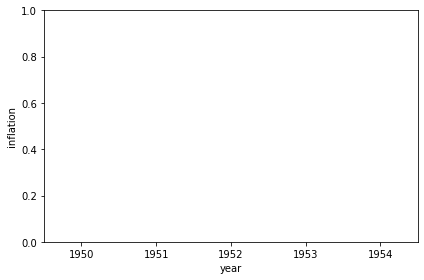

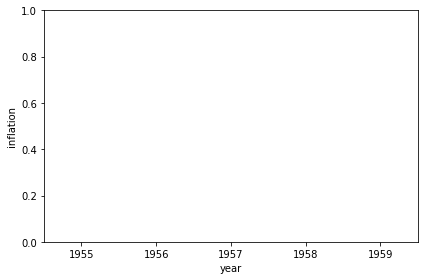

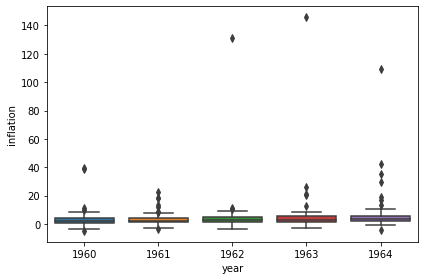

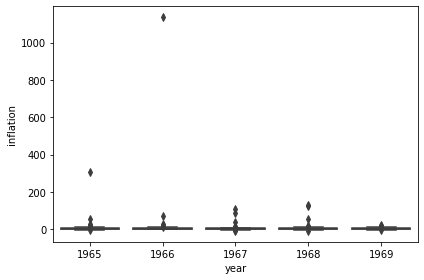

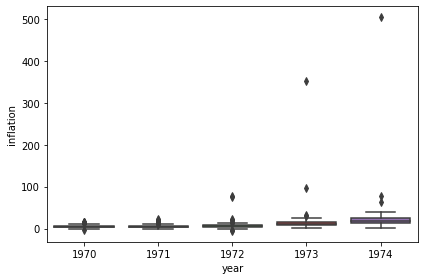

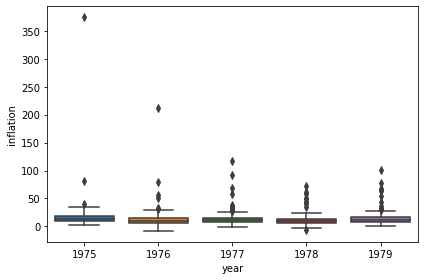

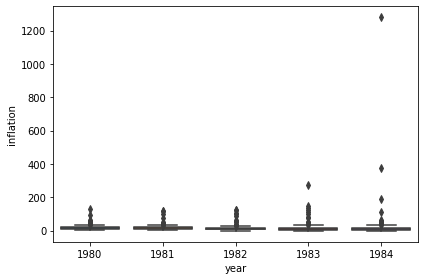

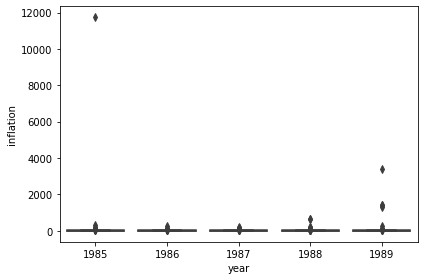

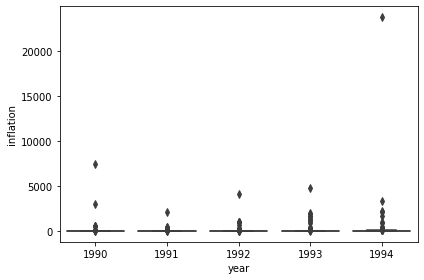

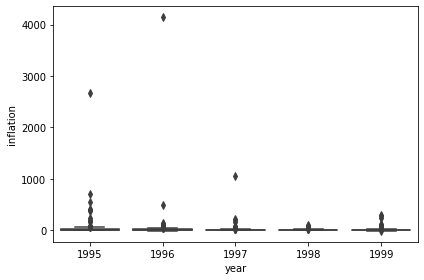

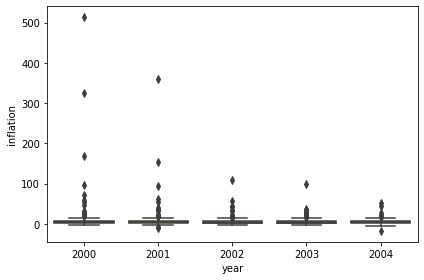

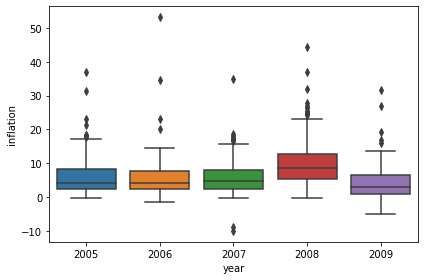

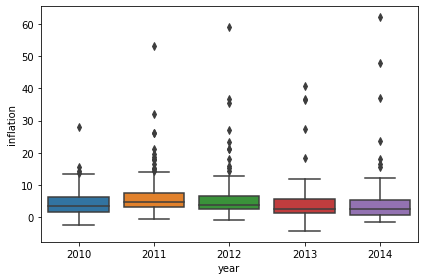

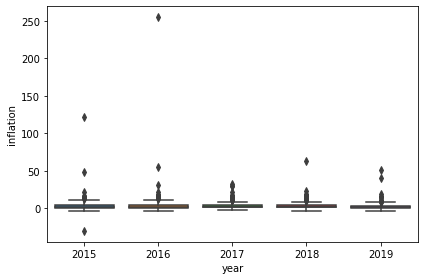

In [88]:
#getting boxlpot of inflation for each year
for i in df_ft.year.unique().reshape(14,5):
    data = df_ft[df_ft.year.isin(i)]
    sns.boxplot(data.year, data.inflation, data=data)
    plt.tight_layout()
    plt.show()

<AxesSubplot:>

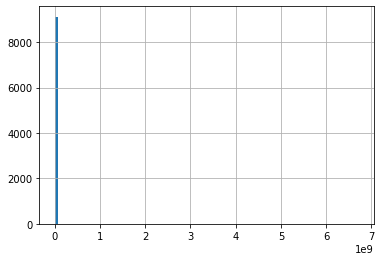

In [89]:
df_ft.exchange_rate.hist(bins=100)

In [93]:
#getting outlier for exchange_rate
df_model[df_model.exchange_rate > 10000]

,country,year,rgdpe,rgdpo,pop,hc,csh_i,csh_g,rtfpna,trade,life_expt,inflation,exchange_rate,military_expt,score,polity2,Status,gdp_per,share_of_gdp,share_of_pop
3689,Ecuador,1999,6.686241e+04,6.606122e+04,12.442115,2.428766,0.158481,0.192761,0.932356,49.201251,72.425,52.242351,1.178680e+04,1.751925,NaN,9.0,NaN,5309.484662,0.001122,0.002083
5438,Indonesia,1998,9.490541e+05,8.147681e+05,206.591122,2.124237,0.165424,0.149898,0.802198,96.186192,65.244,58.451044,1.001362e+04,1.019117,NaN,-5.0,NaN,3943.867745,0.014326,0.035033
5441,Indonesia,2001,8.898750e+05,8.150285e+05,214.427417,2.207746,0.183373,0.123899,0.798785,69.793208,66.037,11.500115,1.026085e+04,0.572793,NaN,6.0,NaN,3800.952842,0.012900,0.034999
5449,Indonesia,2009,1.676000e+06,1.666514e+06,238.620563,2.392601,0.272553,0.129241,0.877026,45.512121,68.853,4.386416,1.038994e+04,0.571134,NaN,8.0,3.0,6983.949661,0.018470,0.035298
5453,Indonesia,2013,2.590538e+06,2.620225e+06,251.805307,2.373118,0.333182,0.127024,0.947625,48.637373,70.179,6.412513,1.046124e+04,0.918770,32.0,8.0,3.0,10405.757651,0.023752,0.035517
5454,Indonesia,2014,2.625076e+06,2.668206e+06,255.128076,2.358743,0.337288,0.121062,0.962944,48.080176,70.481,6.394925,1.186521e+04,0.777855,34.0,9.0,2.0,10458.301148,0.023770,0.035572
5455,Indonesia,2015,2.660288e+06,2.647759e+06,258.383256,2.344456,0.335011,0.123670,0.975076,41.937640,70.768,6.363121,1.338941e+04,0.882267,36.0,9.0,2.0,10247.408408,0.023486,0.035616
5456,Indonesia,2016,2.710646e+06,2.698172e+06,261.556381,2.330255,0.334833,0.116510,0.992028,37.421342,71.035,3.525805,1.330833e+04,0.791898,37.0,9.0,2.0,10315.833205,0.023538,0.035649
5457,Indonesia,2017,2.819441e+06,2.816072e+06,264.650963,2.316139,0.341887,0.107642,1.000000,39.355497,71.282,3.808798,1.338083e+04,0.865257,37.0,9.0,2.0,10640.702826,0.023599,0.035672
5458,Indonesia,2018,2.982256e+06,3.010716e+06,267.670543,2.302110,0.344372,0.106499,1.006509,43.001944,71.509,3.198346,1.423694e+04,0.725522,38.0,9.0,2.0,11247.841157,0.024529,0.035688


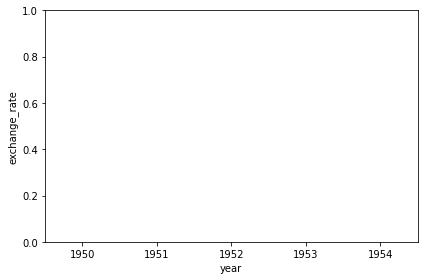

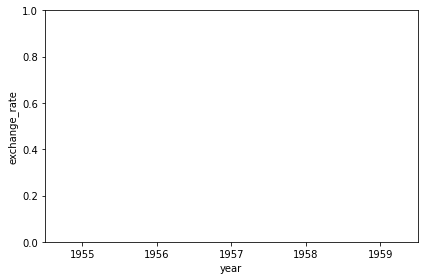

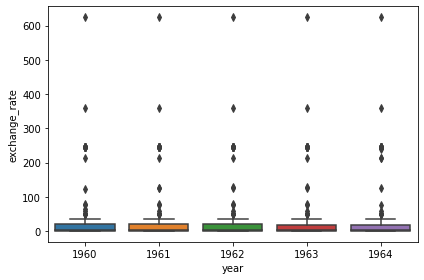

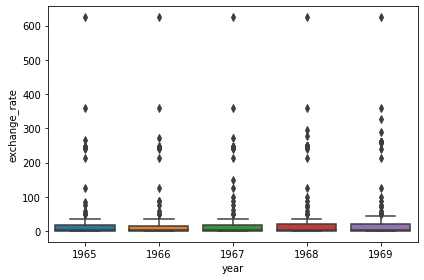

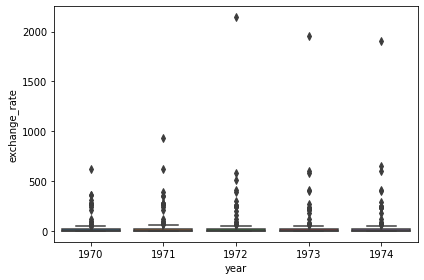

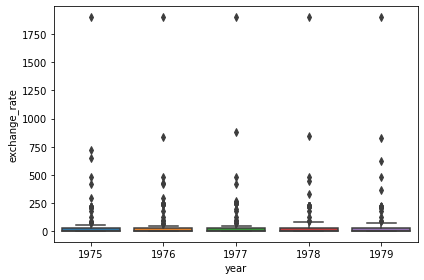

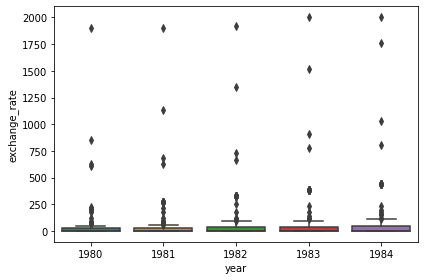

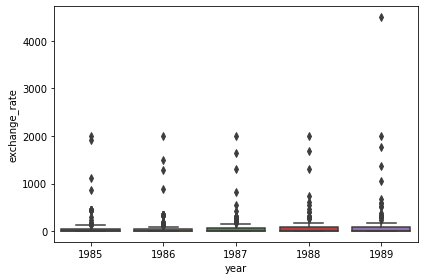

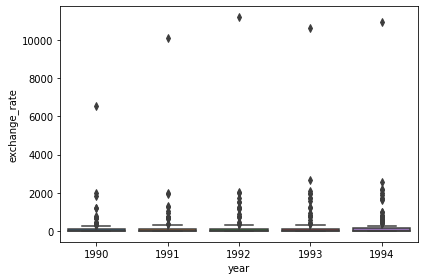

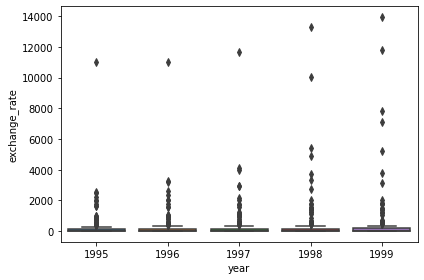

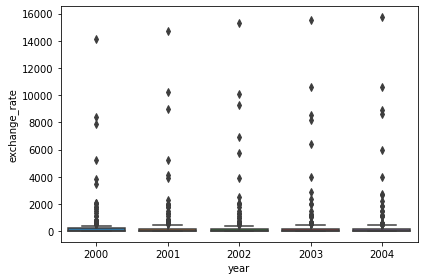

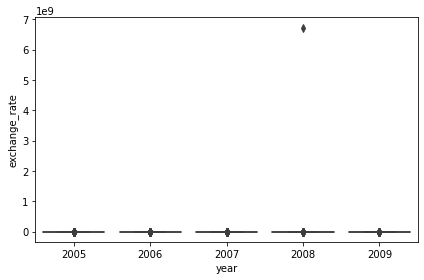

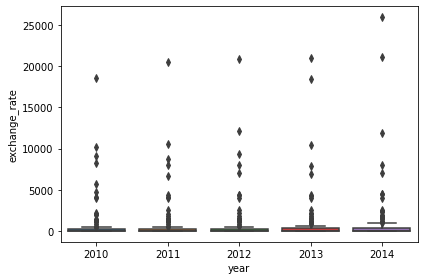

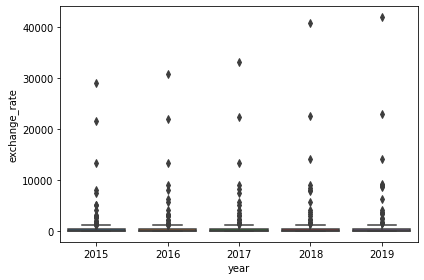

In [94]:
#getting boxlpot of exchange_rate for each year
for i in df_ft.year.unique().reshape(14,5):
    data = df_ft[df_ft.year.isin(i)]
    sns.boxplot(data.year, data.exchange_rate, data=data)
    plt.tight_layout()
    plt.show()

#### Due to data availability and time concerns, the study will cover after 2000

In [96]:
df_model = df_model[df_model.year > 1999]

In [97]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3660 entries, 50 to 12809
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3660 non-null   object 
 1   year           3660 non-null   int64  
 2   rgdpe          3650 non-null   float64
 3   rgdpo          3650 non-null   float64
 4   pop            3650 non-null   float64
 5   hc             2900 non-null   float64
 6   csh_i          3650 non-null   float64
 7   csh_g          3650 non-null   float64
 8   rtfpna         2360 non-null   float64
 9   trade          3285 non-null   float64
 10  life_expt      3308 non-null   float64
 11  inflation      3267 non-null   float64
 12  exchange_rate  3158 non-null   float64
 13  military_expt  2915 non-null   float64
 14  score          1181 non-null   float64
 15  polity2        1887 non-null   float64
 16  Status         2762 non-null   float64
 17  gdp_per        3650 non-null   float64
 18  share_

In [100]:
df_ft = df_model.drop(columns=['rgdpe','rgdpo','pop','score','polity2','Status','share_of_pop'])
df_t = df_model[['country','year','Status','polity2']]

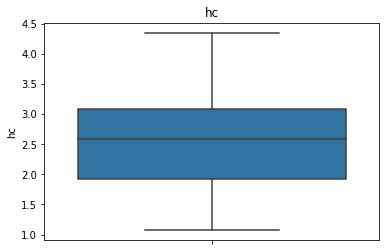

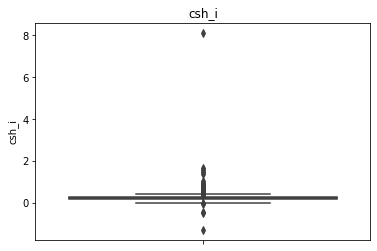

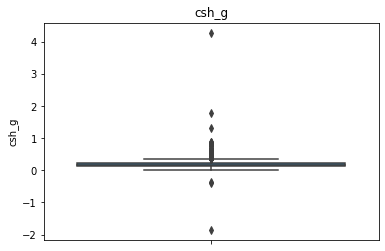

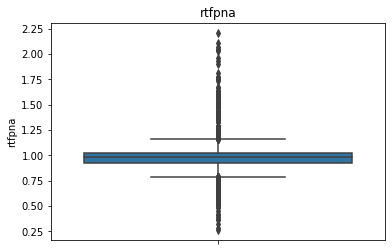

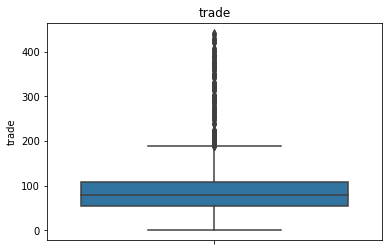

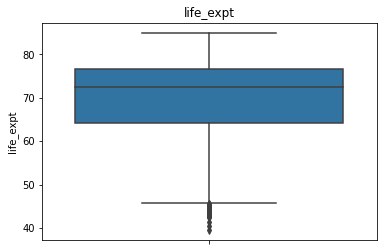

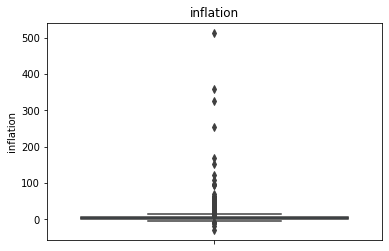

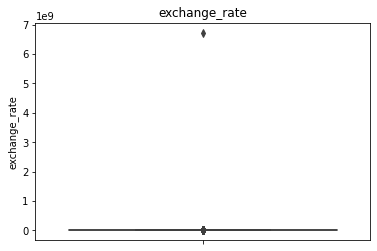

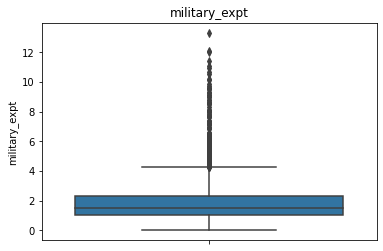

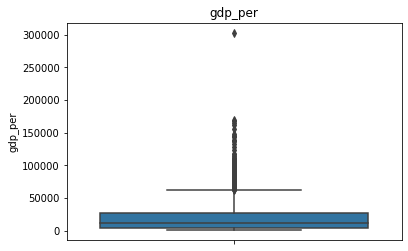

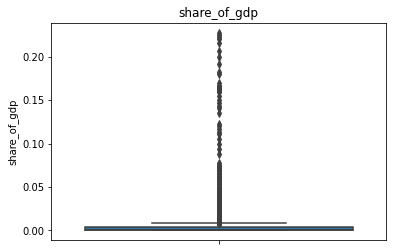

In [101]:
#boxplotting for each independent variables
for i in df_ft.columns[2:]:
    sns.boxplot(y=df_ft[i])
    plt.title(i)
    plt.show()

In [102]:
#getting outlier for exchange_rate
df_model[df_model.exchange_rate > 10000]

,country,year,rgdpe,rgdpo,pop,hc,csh_i,csh_g,rtfpna,trade,life_expt,inflation,exchange_rate,military_expt,score,polity2,Status,gdp_per,share_of_gdp,share_of_pop
5441,Indonesia,2001,8.898750e+05,8.150285e+05,214.427417,2.207746,0.183373,0.123899,0.798785,69.793208,66.037,11.500115,1.026085e+04,0.572793,NaN,6.0,NaN,3800.952842,0.012900,0.034999
5449,Indonesia,2009,1.676000e+06,1.666514e+06,238.620563,2.392601,0.272553,0.129241,0.877026,45.512121,68.853,4.386416,1.038994e+04,0.571134,NaN,8.0,3.0,6983.949661,0.018470,0.035298
5453,Indonesia,2013,2.590538e+06,2.620225e+06,251.805307,2.373118,0.333182,0.127024,0.947625,48.637373,70.179,6.412513,1.046124e+04,0.918770,32.0,8.0,3.0,10405.757651,0.023752,0.035517
5454,Indonesia,2014,2.625076e+06,2.668206e+06,255.128076,2.358743,0.337288,0.121062,0.962944,48.080176,70.481,6.394925,1.186521e+04,0.777855,34.0,9.0,2.0,10458.301148,0.023770,0.035572
5455,Indonesia,2015,2.660288e+06,2.647759e+06,258.383256,2.344456,0.335011,0.123670,0.975076,41.937640,70.768,6.363121,1.338941e+04,0.882267,36.0,9.0,2.0,10247.408408,0.023486,0.035616
5456,Indonesia,2016,2.710646e+06,2.698172e+06,261.556381,2.330255,0.334833,0.116510,0.992028,37.421342,71.035,3.525805,1.330833e+04,0.791898,37.0,9.0,2.0,10315.833205,0.023538,0.035649
5457,Indonesia,2017,2.819441e+06,2.816072e+06,264.650963,2.316139,0.341887,0.107642,1.000000,39.355497,71.282,3.808798,1.338083e+04,0.865257,37.0,9.0,2.0,10640.702826,0.023599,0.035672
5458,Indonesia,2018,2.982256e+06,3.010716e+06,267.670543,2.302110,0.344372,0.106499,1.006509,43.001944,71.509,3.198346,1.423694e+04,0.725522,38.0,9.0,2.0,11247.841157,0.024529,0.035688
5459,Indonesia,2019,3.104439e+06,3.137931e+06,270.625568,2.288165,0.336446,0.106387,1.010216,37.303398,NaN,3.030587,1.414767e+04,0.674409,40.0,NaN,2.0,11595.101761,0.025049,0.035698
5660,Iran (Islamic Republic of),2010,1.415568e+06,1.410083e+06,73.762519,2.121989,0.316793,0.194602,1.030315,43.770644,73.905,10.089363,1.025418e+04,2.906913,NaN,NaN,NaN,19116.524478,0.014365,0.010780


In [103]:
#there is an extreme outlier, it is better if it is dropped
df_model.drop(12798, inplace=True)

In [105]:
df_ft.drop(12798, inplace=True)

<AxesSubplot:ylabel='exchange_rate'>

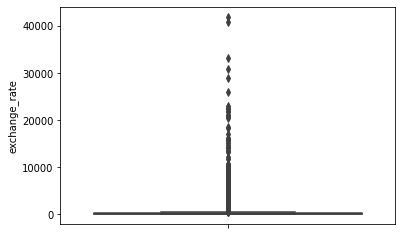

In [106]:
sns.boxplot(y=df_ft['exchange_rate'])

In [108]:
#getting outlier for inflation
df_model[df_model.inflation > 200]

,country,year,rgdpe,rgdpo,pop,hc,csh_i,csh_g,rtfpna,trade,life_expt,inflation,exchange_rate,military_expt,score,polity2,Status,gdp_per,share_of_gdp,share_of_pop
120,Angola,2000,40896.878906,36538.808594,16.395473,1.296941,0.380562,0.247028,0.616827,152.547109,46.522,324.996872,10.040544,6.392603,NaN,-6.0,1.0,2228.591306,0.000590,0.002710
2570,D.R. of the Congo,2000,26065.494141,25657.191406,47.105826,1.553157,0.098102,0.102935,NaN,27.014403,50.041,513.906844,21.818333,0.220261,NaN,NaN,NaN,544.671298,0.000414,0.007787
2571,D.R. of the Congo,2001,25808.453125,25649.095703,48.428545,1.561196,0.106224,0.068918,NaN,25.041938,50.667,359.936614,206.617500,NaN,NaN,NaN,NaN,529.627634,0.000406,0.007905
12386,Venezuela (Bolivarian Republic of),2016,59792.726562,63499.085938,29.851255,2.787925,0.000956,0.225732,1.138007,NaN,72.405,254.948535,9.257344,0.454046,NaN,NaN,NaN,2127.183126,0.000554,0.004069


In [109]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3660 entries, 50 to 12809
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  3660 non-null   object 
 1   year     3660 non-null   int64  
 2   Status   2762 non-null   float64
 3   polity2  1887 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 303.0+ KB


In [110]:
df_t.corr()

,year,Status,polity2
year,1.000000,-0.004132,0.092534
Status,-0.004132,1.000000,0.821463
polity2,0.092534,0.821463,1.000000


#### Since we more for about Status, we will continue with Status, and try to fill missing values

In [137]:
pd.crosstab(df_t.Status, df_t.polity2).T

Status,1.0,2.0,3.0
polity2,,,
-10.0,44,0,0
-9.0,30,0,0
-8.0,23,0,0
-7.0,32,9,0
-6.0,44,16,0
-5.0,12,1,0
-4.0,40,28,0
-3.0,53,12,0
-2.0,49,35,0


#### if polity2 is less -7, the only option is 1

In [157]:
for i in df_model.index:
    if pd.isna(df_model.loc[i]['Status']):
        if df_model.loc[i]['polity2'] < -7:
            df_model['Status'][i] = 1
        
        

In [158]:
pd.crosstab(df_model.Status, df_model.polity2).T

Status,1.0,2.0,3.0
polity2,,,
-10.0,50,0,0
-9.0,35,0,0
-8.0,25,0,0
-7.0,32,9,0
-6.0,44,16,0
-5.0,12,1,0
-4.0,39,28,0
-3.0,53,12,0
-2.0,49,35,0


In [159]:
for i in df_model.index:
    if pd.isna(df_model.loc[i]['Status']):
        if df_model.loc[i]['polity2'] > 9:
            df_model['Status'][i] = 3
        

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [160]:
pd.crosstab(df_model.Status, df_model.polity2).T

Status,1.0,2.0,3.0
polity2,,,
-10.0,50,0,0
-9.0,35,0,0
-8.0,25,0,0
-7.0,32,9,0
-6.0,44,16,0
-5.0,12,1,0
-4.0,39,28,0
-3.0,53,12,0
-2.0,49,35,0


In [161]:
df_t = df_model[['country','year','Status','polity2']]

In [162]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3659 entries, 50 to 12809
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  3659 non-null   object 
 1   year     3659 non-null   int64  
 2   Status   2809 non-null   float64
 3   polity2  1886 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 302.9+ KB


In [171]:
#in case of using ffill method
df_model.Status.fillna(method = 'ffill').head(20)

50   NaN
51   NaN
52   NaN
53   NaN
54   NaN
55   NaN
56   NaN
57   NaN
58   NaN
59   NaN
60   NaN
61   NaN
62   NaN
63   NaN
64   NaN
65   NaN
66   NaN
67   NaN
68   NaN
69   NaN
Name: Status, dtype: float64

In [174]:
#there are some countries which have not any value for Status
df_model[df_model['country'] == 'Aruba']

,country,year,rgdpe,rgdpo,pop,hc,csh_i,csh_g,rtfpna,trade,life_expt,inflation,exchange_rate,military_expt,score,polity2,Status,gdp_per,share_of_gdp,share_of_pop
50,Aruba,2000,4031.134277,4129.512695,0.090853,NaN,0.299764,0.116335,NaN,145.073178,73.787,4.044021,1.79,NaN,NaN,NaN,NaN,45452.683954,0.000067,0.000015
51,Aruba,2001,4122.958496,4728.453125,0.092898,NaN,0.281268,0.116075,NaN,139.045679,73.853,2.883604,1.79,NaN,NaN,NaN,NaN,50899.407145,0.000075,0.000015
52,Aruba,2002,4101.703125,3555.261230,0.094992,NaN,0.409718,0.150959,NaN,134.302158,73.937,3.315247,1.79,NaN,NaN,NaN,NaN,37426.954169,0.000055,0.000015
53,Aruba,2003,4209.140137,3701.983643,0.097017,NaN,0.435208,0.157434,NaN,133.969044,74.038,3.656365,1.79,NaN,NaN,NaN,NaN,38158.092320,0.000055,0.000015
54,Aruba,2004,4548.991211,4227.812012,0.098737,NaN,0.412306,0.143636,NaN,133.642517,74.156,2.529129,1.79,NaN,NaN,NaN,NaN,42818.923116,0.000059,0.000016
55,Aruba,2005,4705.818359,4568.418945,0.100031,NaN,0.488939,0.152567,NaN,146.500479,74.287,3.397787,1.79,NaN,NaN,NaN,NaN,45670.031743,0.000059,0.000016
56,Aruba,2006,4748.858887,4846.382812,0.100834,NaN,0.493411,0.144959,NaN,143.963134,74.429,3.608024,1.79,NaN,NaN,NaN,NaN,48062.982848,0.000059,0.000015
57,Aruba,2007,4863.892090,4755.243164,0.101222,NaN,0.479468,0.154105,NaN,142.960906,74.576,5.392568,1.79,NaN,NaN,NaN,NaN,46978.356129,0.000054,0.000015
58,Aruba,2008,4786.577148,4888.021484,0.101358,NaN,0.480595,0.153893,NaN,145.889296,74.725,8.955987,1.79,NaN,NaN,NaN,NaN,48225.315065,0.000053,0.000015
59,Aruba,2009,4350.844727,4247.337402,0.101455,NaN,0.436243,0.182639,NaN,140.062598,74.872,-2.135429,1.79,NaN,NaN,NaN,NaN,41864.249198,0.000047,0.000015


In [175]:
#droppinf Aruba
df_model = df_model[df_model['country'] != 'Aruba']

In [199]:
#groupping countries which have null values count their size, and take ones having more than 5 null values
df_temp = (df_model[df_model.Status.isnull()].groupby('country').size() > 5).to_frame()
#dropping countries list that is obtained above
df_model = df_model[df_model.country.isin(df_temp[df_temp[0] == True].index) ==False]

In [200]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3039 entries, 120 to 12809
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3039 non-null   object 
 1   year           3039 non-null   int64  
 2   rgdpe          3039 non-null   float64
 3   rgdpo          3039 non-null   float64
 4   pop            3039 non-null   float64
 5   hc             2539 non-null   float64
 6   csh_i          3039 non-null   float64
 7   csh_g          3039 non-null   float64
 8   rtfpna         2119 non-null   float64
 9   trade          2860 non-null   float64
 10  life_expt      2850 non-null   float64
 11  inflation      2798 non-null   float64
 12  exchange_rate  2663 non-null   float64
 13  military_expt  2622 non-null   float64
 14  score          1151 non-null   float64
 15  polity2        1854 non-null   float64
 16  Status         2783 non-null   float64
 17  gdp_per        3039 non-null   float64
 18  share

In [202]:
#using ffill method
df_model.Status = df_model.Status.fillna(method ='ffill')

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [203]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3039 entries, 120 to 12809
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3039 non-null   object 
 1   year           3039 non-null   int64  
 2   rgdpe          3039 non-null   float64
 3   rgdpo          3039 non-null   float64
 4   pop            3039 non-null   float64
 5   hc             2539 non-null   float64
 6   csh_i          3039 non-null   float64
 7   csh_g          3039 non-null   float64
 8   rtfpna         2119 non-null   float64
 9   trade          2860 non-null   float64
 10  life_expt      2850 non-null   float64
 11  inflation      2798 non-null   float64
 12  exchange_rate  2663 non-null   float64
 13  military_expt  2622 non-null   float64
 14  score          1151 non-null   float64
 15  polity2        1854 non-null   float64
 16  Status         3039 non-null   float64
 17  gdp_per        3039 non-null   float64
 18  share

In [210]:
df_model['code'] = df_model.join(df_var, rsuffix='r_')['countrycode']

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# showing democracy status for each countries at the world

In [214]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [211]:
data = dict(
        type = 'choropleth',
        locations = df_model['code'],
        z = df_model['Status'],
        text = df_model['country'],
        colorbar = {'title' : 'Democracy'},
      ) 

In [218]:
layout = dict(
    title = 'Democracy',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

In [216]:
init_notebook_mode(connected=True) 

In [219]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)